# Processing TESS sector 6 data for TOI4504

In [1]:
%matplotlib inline
from process_TESS_data.process_flux_data import *
path = '../research/star_systems/TOI-4504/lightkurve/'

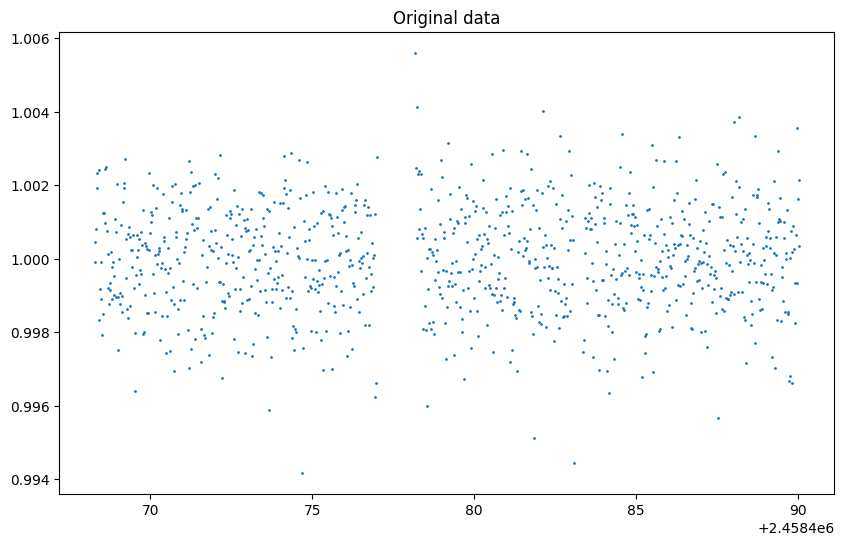

,time,flux,flux_err
0,2.458468e+06,0.999904,NaN
1,2.458468e+06,1.000469,NaN
2,2.458468e+06,1.000824,NaN
3,2.458468e+06,1.002342,NaN
4,2.458468e+06,1.001921,NaN
...,...,...,...
959,2.458490e+06,1.003575,NaN
960,2.458490e+06,0.999338,NaN
961,2.458490e+06,1.001638,NaN
962,2.458490e+06,1.002146,NaN


In [2]:
full_path = path+"6/6_TGLC_1800.csv"
df = csv2df(full_path)
df = tesstime2bjd(df)
plot_this(df.time, [df.flux], ["flux"], title="Original data")
df

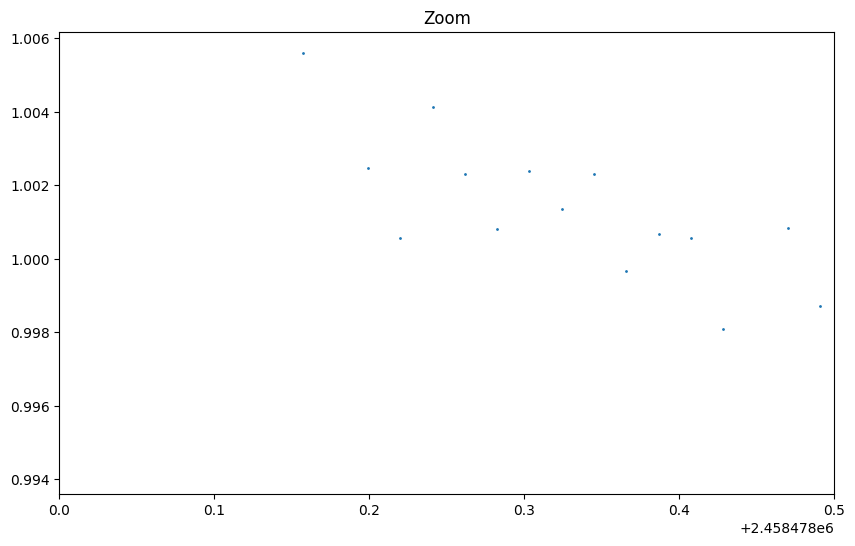

In [3]:
plot_this(df.time, [df.flux], ["flux"], title="Zoom", left=2458478, right=2458478.5)

In [4]:
df = remove_from_df(df, 2458478.1, 2458478.35)

In [5]:
df = calculate_flux_err(df, window_length=101)
df

C:\Users\ulsc\OneDrive - AspIT - Ondrive\Uli\Python\curvesim\process_TESS_data\process_flux_data.py:97: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flux_err'] = flux_err


,time,flux,flux_err
0,2.458468e+06,0.999904,0.001367
1,2.458468e+06,1.000469,0.001355
2,2.458468e+06,1.000824,0.001356
3,2.458468e+06,1.002342,0.001344
4,2.458468e+06,1.001921,0.001331
...,...,...,...
959,2.458490e+06,1.003575,0.001485
960,2.458490e+06,0.999338,0.001498
961,2.458490e+06,1.001638,0.001510
962,2.458490e+06,1.002146,0.001525


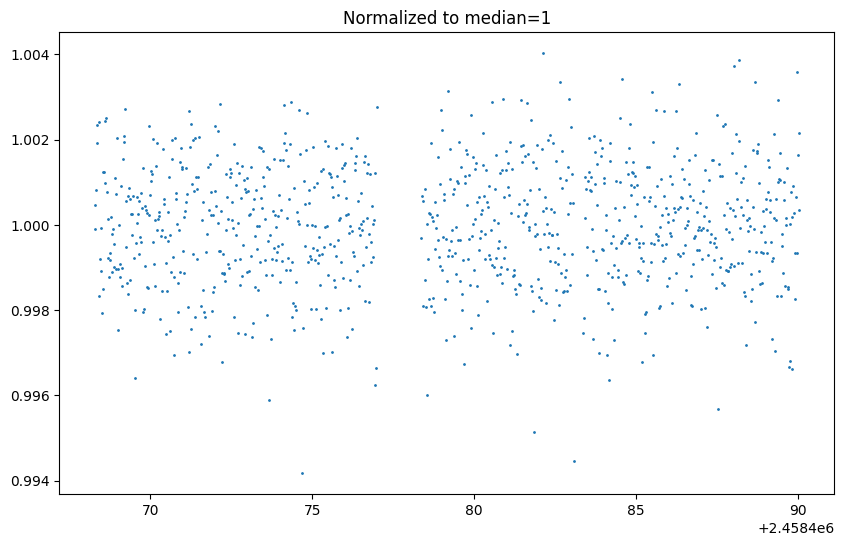

,time,flux,flux_err
0,2.458468e+06,0.999906,0.001367
1,2.458468e+06,1.000471,0.001355
2,2.458468e+06,1.000827,0.001356
3,2.458468e+06,1.002344,0.001344
4,2.458468e+06,1.001924,0.001331
...,...,...,...
959,2.458490e+06,1.003578,0.001485
960,2.458490e+06,0.999341,0.001498
961,2.458490e+06,1.001641,0.001510
962,2.458490e+06,1.002148,0.001525


In [6]:
median = median_flux(df)
df = scale_flux(df, 1/median)
plot_this(df.time, [df.flux], ["flux"], title="Normalized to median=1")
df

In [7]:
df2csv(df, full_path[:-4]+"_p.csv")